In [12]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from scipy.signal import find_peaks

In [213]:
cols = ["wavelength", "intensity"]
raw_data = pd.read_csv("DataFiles/hydrogen_green_tube_multi_point3_300_900_nm_run_3.txt", delimiter="\t", names=cols)
raw_background = pd.read_csv("DataFiles/test_background_0.3.txt", delimiter="\t", names=cols)

raw_data

,wavelength,intensity
0,300.000,0.2460
1,300.125,0.2492
2,300.250,0.2460
3,300.375,0.2492
4,300.500,0.2468
...,...,...
4795,899.375,0.2366
4796,899.500,0.2366
4797,899.625,0.2358
4798,899.750,0.2358


In [214]:
peaks, properties = find_peaks(raw_data["intensity"], height=0, prominence=.051, distance=30)#, threshold=12, distance=1)#, width=2)

peaks

raw_data["wavelength"][peaks]

705     388.125
894     411.750
1309    463.625
2668    633.500
Name: wavelength, dtype: float64

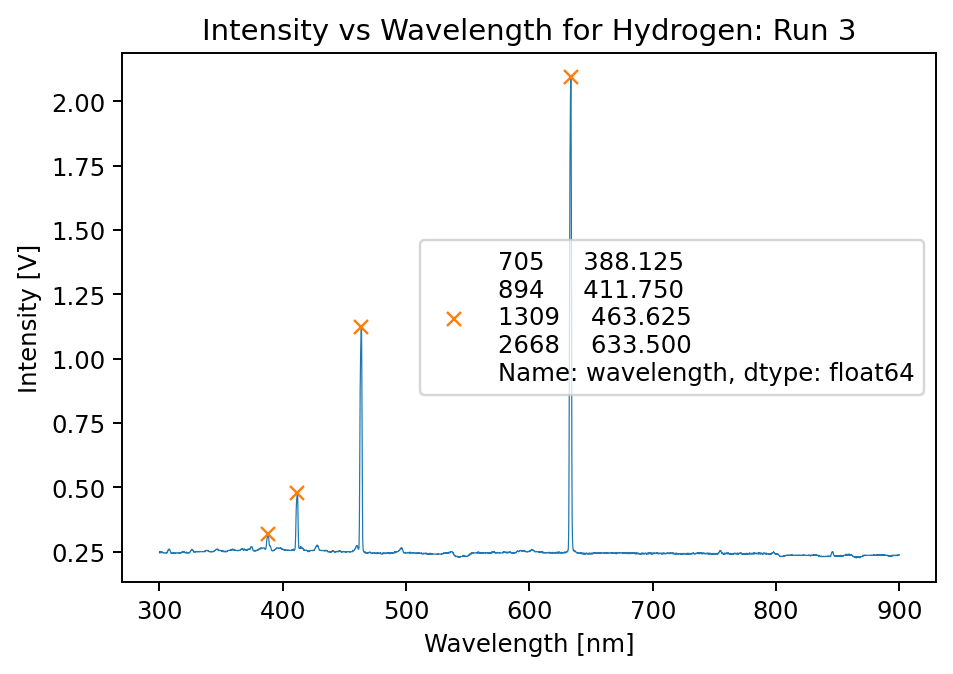

In [221]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Hydrogen: Run 3")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_data["wavelength"], raw_data["intensity"], lw=.5)
plt.plot(raw_data["wavelength"][peaks], raw_data["intensity"][peaks], "x", label=raw_data["wavelength"][peaks])
plt.legend()

In [216]:
properties#[2290]

{'peak_heights': array([0.3183, 0.4764, 1.1226, 2.0935]),
 'prominences': array([0.0652, 0.2296, 0.8797, 1.8656]),
 'left_bases': array([ 102,  102,  102, 1943]),
 'right_bases': array([ 731, 1208, 1943, 4517])}

In [217]:
366.875
424.750
479.250
564.875
645.000
684.000
755.375

755.375

In [218]:
raw_data["wavelength"][peaks]

705     388.125
894     411.750
1309    463.625
2668    633.500
Name: wavelength, dtype: float64

In [219]:
np.sort(expected)

array([410.1, 434. , 486.1, 656.2])

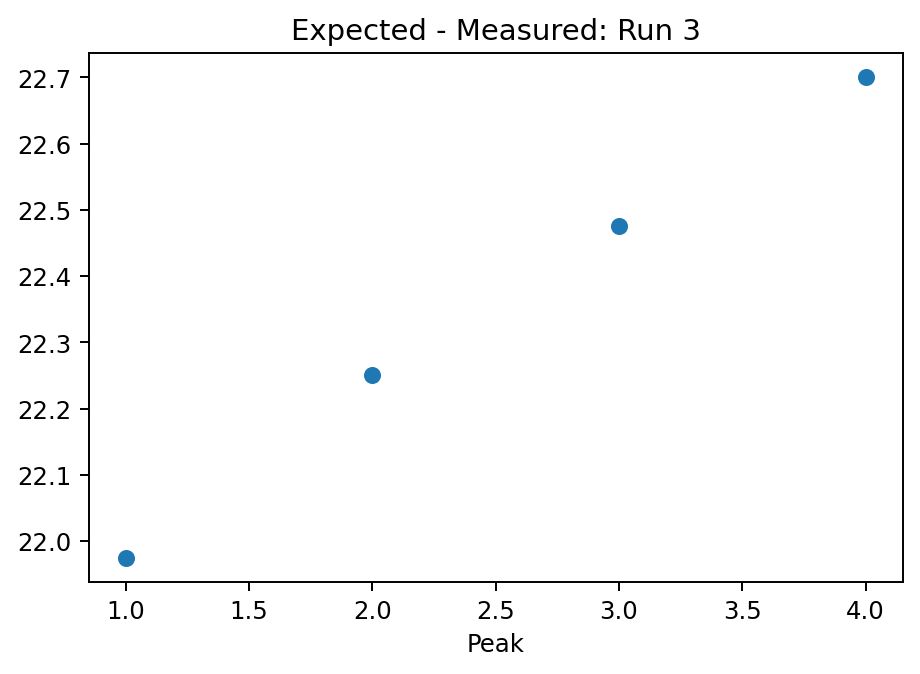

In [222]:
expected = np.array([656.2, 486.1, 434.0, 410.1])


plt.figure(dpi=175)
plt.title("Expected - Measured: Run 3")
plt.xlabel("Peak")

plt.scatter([1,2,3,4], np.sort(expected) - raw_data["wavelength"][peaks])

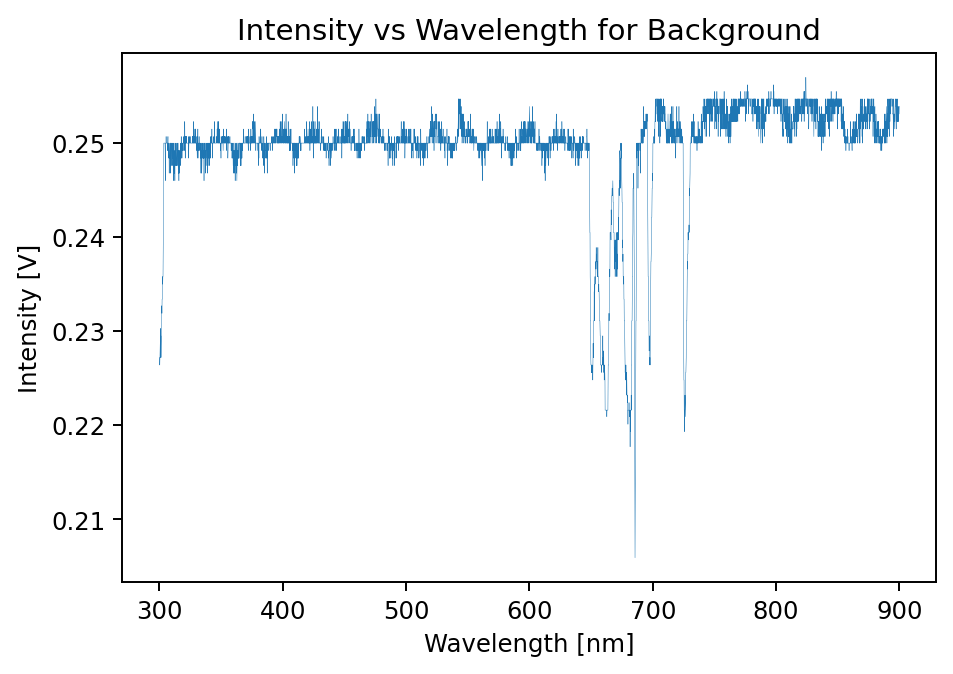

In [11]:
plt.figure(dpi=175)
plt.title("Intensity vs Wavelength for Background")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [V]")
plt.plot(raw_background["wavelength"], raw_background["intensity"], lw=.2)